# Prototype

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
data = pd.read_excel('test.xlsx')
data.head()

,FomRapoManmRezogmail-community,FomRapoManmRezogmail-today,FomRapoManmRezogmail-principalActivity,FomRapoManmRezogmail-numberPeople,FomRapoManmRezogmail-networkMember
0,arlington,2018-02-10,painting,32,netmem1
1,arlington,2018-02-10,awareness,30,netmem2
2,fairfax,2018-02-13,awareness,42,netmem1
3,loudoun,2018-03-07,awareness,16,netmem2
4,alexandria,2018-02-28,painting,15,netmem1


In [5]:
#convert to months
data['month'] = pd.DatetimeIndex(data['FomRapoManmRezogmail-today']).month
data['month']
data.head()

,FomRapoManmRezogmail-community,FomRapoManmRezogmail-today,FomRapoManmRezogmail-principalActivity,FomRapoManmRezogmail-numberPeople,FomRapoManmRezogmail-networkMember,month
0,arlington,2018-02-10,painting,32,netmem1,2
1,arlington,2018-02-10,awareness,30,netmem2,2
2,fairfax,2018-02-13,awareness,42,netmem1,2
3,loudoun,2018-03-07,awareness,16,netmem2,3
4,alexandria,2018-02-28,painting,15,netmem1,2


([<matplotlib.axis.XTick at 0x1185deef0>,
 <a list of 4 Text xticklabel objects>)

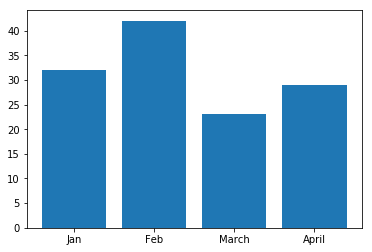

In [6]:
plt.bar(data['month'],data['FomRapoManmRezogmail-numberPeople'])
plt.xticks(np.arange(1,5),['Jan', 'Feb', 'March', 'April'])

In [7]:
#create a new data frame that is indexed by sex, name, and year and also sorted
allmonths_indexed_activity = data.set_index([data['month'],data['FomRapoManmRezogmail-community'], data['FomRapoManmRezogmail-principalActivity']]).sort_index()
allmonths_indexed_activity = allmonths_indexed_activity.drop(columns = ['FomRapoManmRezogmail-networkMember', 'FomRapoManmRezogmail-today', 'month', 'FomRapoManmRezogmail-community', 'FomRapoManmRezogmail-principalActivity'])

In [8]:
def plotname(month, community):
    df = allmonths_indexed_activity.loc[month, community]
    plt.plot(df.index, df.values)
print(allmonths_indexed_activity.index)
allmonths_indexed_activity

MultiIndex(levels=[[1, 2, 3, 4], ['alexandria', 'arlington', 'fairfax', 'loudoun'], ['awareness', 'health camp', 'painting']],
           labels=[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3], [1, 2, 0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 0], [1, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 0, 2, 0]],
           names=['month', 'FomRapoManmRezogmail-community', 'FomRapoManmRezogmail-principalActivity'])


FomRapoManmRezogmail-numberPeople
month FomRapoManmRezogmail-community FomRapoManmRezogmail-principalActivity                                   
1     arlington                      health camp                                                            32
      fairfax                        painting                                                               16
2     alexandria                     health camp                                                            25
                                     health camp                                                            29
                                     painting                                                               15
      arlington                      awareness                                                              30
                                     painting                                                               32
      fairfax                        awareness                                                              42
                                     awareness                                                              14
                                     health camp                                                            32
      loudoun                        health camp                                                            33
3     loudoun                        awareness                                                              16
                                     painting                                                               23
4     alexandria                     awareness                                                              29

FomRapoManmRezogmail-principalActivity  awareness  health camp  painting
month                                                                   
1                                             NaN         32.0      16.0
2                                            86.0        119.0      47.0
3                                            16.0          NaN      23.0
4                                            29.0          NaN       NaN


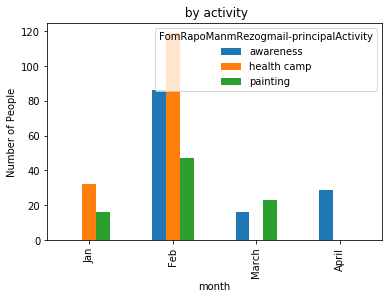

In [32]:
groupby_month_activity = data.groupby(['month','FomRapoManmRezogmail-principalActivity'])

activity_by_month = groupby_month_activity['FomRapoManmRezogmail-numberPeople'].aggregate(np.sum).unstack()

print(activity_by_month)

activity_by_month.plot(kind = 'bar', title = ' by activity')
plt.ylabel('Number of People')
plt.xlabel('month')
plt.xticks(np.arange(0,4),['Jan', 'Feb', 'March', 'April'])
plt.show()

FomRapoManmRezogmail-community  alexandria  arlington  fairfax  loudoun
month                                                                  
1                                      NaN       32.0     16.0      NaN
2                                     69.0       62.0     88.0     33.0
3                                      NaN        NaN      NaN     39.0
4                                     29.0        NaN      NaN      NaN


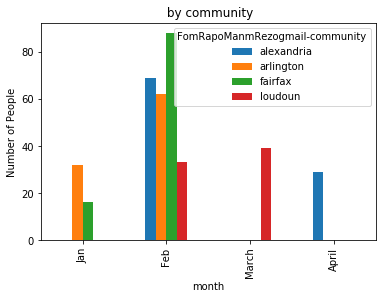

In [33]:
groupby_month_community = data.groupby(['month','FomRapoManmRezogmail-community'])

community_by_month = groupby_month_community['FomRapoManmRezogmail-numberPeople'].aggregate(np.sum).unstack()

print(community_by_month)

community_by_month.plot(kind = 'bar', title = ' by community')
plt.ylabel('Number of People')
plt.xlabel('month')
plt.xticks(np.arange(0,4),['Jan', 'Feb', 'March', 'April'])
plt.show()